In [ ]:
from google.colab import files
up = files.upload()

Saving Heart.csv to Heart.csv


# Préparation des données

In [ ]:
# Importation de bibliotheques necessaires
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
# créer une variable 'data' où on va enregitrer les données (type csv ou excel,..)
dh = pd.read_csv("Heart.csv")
dh

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
# eliminer la première colonne 'unnamed:0' (ne rapporte aucune information)
dh = dh.drop(columns = 'Unnamed: 0')
# afficher le tableau apres l'elimination
dh

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
# convertir les données 'ChestPain' en numériques
dh['ChestPain']=dh['ChestPain'].astype('category')
dh['ChestPain']=dh['ChestPain'].cat.codes

# convertir les données'Thal'  en numériques
dh['Thal']=dh['Thal'].astype('category')
dh['Thal']=dh['Thal'].cat.codes

# convertir les données'AHD' en numériques
dh['AHD']=dh['AHD'].astype('category')
dh['AHD']=dh['AHD'].cat.codes

# affichage de dataset apres les changenements
dh


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [ ]:
# eliminer (ca = 4) les données qui reste non numériques et qui n'affecte pas la totalité des données
dh = dh.dropna()

# vérifier les données de notre tableau
dh.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
#  on va separer les variables indépendantes ou explicatives (x)
x = dh.drop(columns = 'AHD')
x

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [ ]:
#  on va separer les variables à prédire ou expliquée (y)
y = dh['AHD']
y

,AHD
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


AHD
0    0.538462
1    0.461538
Name: proportion, dtype: float64


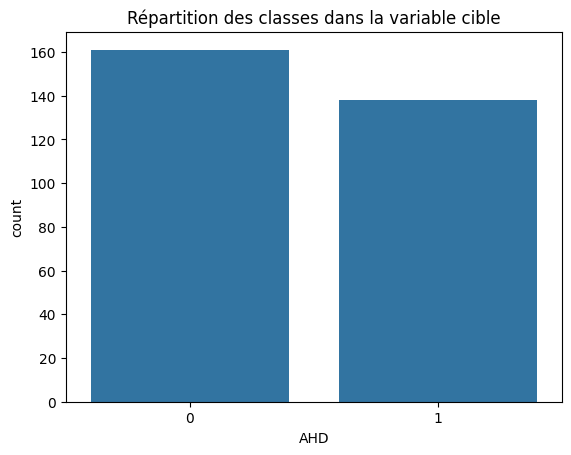

In [ ]:
# Vérifier l'équilibre des classes
print(y.value_counts(normalize=True))

# Visualiser l'équilibre des classes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Répartition des classes dans la variable cible")
plt.show()


In [ ]:
# si vous remarquez, dans le tableau il a a des variables qui ont des grands numéros comme 'Chol' et autres avec des petits chiffres comme 'Fbs', donc on doit normaliser les données
from sklearn.preprocessing import StandardScaler
# Utilisation de StandardScaler pour standariser les données de la dateset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

print(x_scaled)


          Age       Sex  ChestPain    RestBP      Chol       Fbs   RestECG  \
0    0.940674  0.692963   2.247558  0.754191 -0.272061  2.407375  1.010130   
1    1.384830  0.692963  -0.873277  1.602797  0.750555 -0.415390  1.010130   
2    1.384830  0.692963  -0.873277 -0.660154 -0.349239 -0.415390  1.010130   
3   -1.946337  0.692963   0.167001 -0.094416  0.055948 -0.415390 -1.003395   
4   -1.502182 -1.443078   1.207280 -0.094416 -0.831605 -0.415390  1.010130   
..        ...       ...        ...       ...       ...       ...       ...   
294  0.274441 -1.443078  -0.873277  0.471322 -0.117704 -0.415390 -1.003395   
295 -1.058026  0.692963   2.247558 -1.225891  0.326073 -0.415390 -1.003395   
296  1.495869  0.692963  -0.873277  0.697617 -1.043846  2.407375 -1.003395   
297  0.274441  0.692963  -0.873277 -0.094416 -2.240113 -0.415390 -1.003395   
298  0.274441 -1.443078   1.207280 -0.094416 -0.214177 -0.415390  1.010130   

        MaxHR     ExAng   Oldpeak     Slope        Ca      Thal

In [ ]:
# importer depuis la bibliothèque 'sklearn' la fonction pour générer des modèles d’entraînement et de test
from sklearn.model_selection import train_test_split

# Créer les ensembles d’entrainement et de test (splitting)
# 'random_state' est un paramètre pour fixer le nombre de fois à executer la fonction 'train_test_split' sans changer l'ordre des donnée
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=17)

# pour afficher le pourcentage des données d'entrainement et de test
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(239, 13) (60, 13) (239,) (60,)


# Implementation du model "Régression logistique"




In [ ]:
# Entrainement du model de la Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train)

# Prediction
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Extraction des métriques dans un dictionnaire
log_metrics = {
    "Training Accuracy": accuracy_score(y_train, y_pred_train),
    "Testing Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_test, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_test),
    "Classification Report": classification_report(y_test, y_pred_test, output_dict=True)
}


In [ ]:
# Affichage des métriques extraites
print(f"Training Accuracy: {log_metrics['Training Accuracy']:.2f}")
print(f"Testing Accuracy: {log_metrics['Testing Accuracy']:.2f}")
print(f"Precision: {log_metrics['Precision']:.2f}")
print(f"Recall: {log_metrics['Recall']:.2f}")
print(f"F1-Score: {log_metrics['F1-Score']:.2f}")

print("\nConfusion Matrix (Test Data):")
print(log_metrics["Confusion Matrix"])

print("\nClassification Report (Test Data):")


Training Accuracy: 0.87
Testing Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85

Confusion Matrix (Test Data):
[[31  5]
 [ 4 20]]

Classification Report (Test Data):


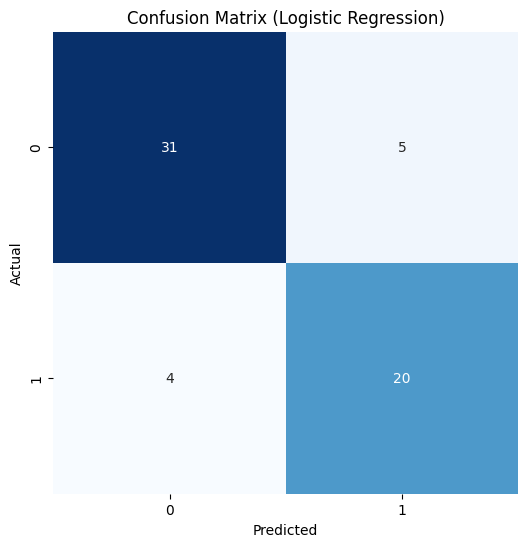

In [ ]:
# Visualisation de matrice de confusion
plt.figure(figsize=(6, 6))
sns.heatmap(log_metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



```
# This is formatted as code
```

# Implementation du model "SVM"


In [ ]:
# # Entrainement du model de la SVM
svm_model = SVC(kernel='linear', random_state=17)
svm_model.fit(x_train, y_train)

# Predictions
y_pred_train_svm = svm_model.predict(x_train)
y_pred_test_svm = svm_model.predict(x_test)


In [ ]:
# Extraction des métriques dans un dictionnaire
svm_metrics = {
    "Training Accuracy": accuracy_score(y_train, y_pred_train_svm),
    "Testing Accuracy": accuracy_score(y_test, y_pred_test_svm),
    "Precision": precision_score(y_test, y_pred_test_svm, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test_svm, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_test_svm, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_test_svm),
    "Classification Report": classification_report(y_test, y_pred_test_svm, output_dict=True)
}


In [ ]:
# Affichage des métriques extraites
print(f"SVM Training Accuracy: {svm_metrics['Training Accuracy']:.2f}")
print(f"SVM Testing Accuracy: {svm_metrics['Testing Accuracy']:.2f}")
print(f"Precision: {svm_metrics['Precision']:.2f}")
print(f"Recall: {svm_metrics['Recall']:.2f}")
print(f"F1-Score: {svm_metrics['F1-Score']:.2f}")

print("\nConfusion Matrix (Test Data):")
print(svm_metrics["Confusion Matrix"])

SVM Training Accuracy: 0.86
SVM Testing Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-Score: 0.82

Confusion Matrix (Test Data):
[[29  7]
 [ 4 20]]


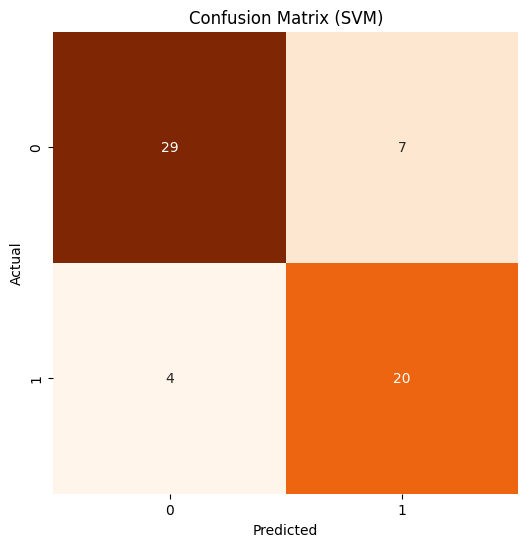

In [ ]:
# Visualisation de matrice de confusion SVM
plt.figure(figsize=(6, 6))
sns.heatmap(svm_metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## **Interpretation et comparaison des resulats**

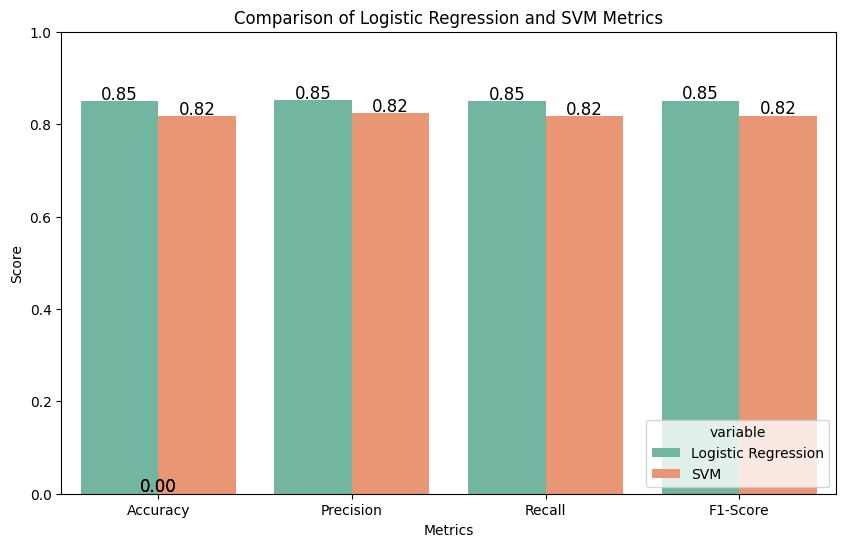

In [ ]:
# Comparison of Logistic Regression and SVM Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_reg_values = [
    log_metrics['Testing Accuracy'],
    log_metrics['Precision'],
    log_metrics['Recall'],
    log_metrics['F1-Score']
]
svm_values = [
    svm_metrics['Testing Accuracy'],
    svm_metrics['Precision'],
    svm_metrics['Recall'],
    svm_metrics['F1-Score']
]

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metrics': metrics,
    'Logistic Regression': log_reg_values,
    'SVM': svm_values
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df.melt(id_vars='Metrics'), x='Metrics', y='value', hue='variable', palette='Set2')

# Adding numerical values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Adding titles and labels
plt.title('Comparison of Logistic Regression and SVM Metrics')
plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()
